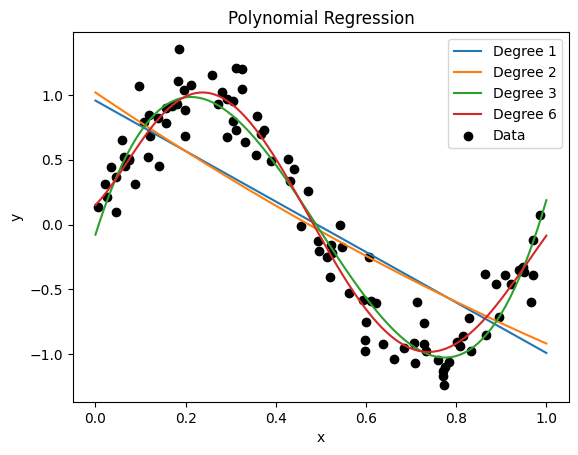

Degree 1: RMSE = 0.4362, R^2 = 0.6893
Degree 2: RMSE = 0.4431, R^2 = 0.6794
Degree 3: RMSE = 0.1785, R^2 = 0.9480
Degree 6: RMSE = 0.1670, R^2 = 0.9545


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

np.random.seed(42)
N = 100
x = np.random.uniform(0, 1, N).reshape(-1, 1)
noise = np.random.normal(0, 0.2, N).reshape(-1, 1)  # шум с отклонением от 0.1 до 0.3
y = np.sin(2 * np.pi * x) + noise

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # делим на обучающую и тестирующую части данных


degrees = [1, 2, 3, 6] # степени полиномов

# метрики ошибок
rmse_list = []
r2_list = []


for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train) ## преобразуем данные к степенному полиному
    x_test_poly = poly.transform(x_test)
    
    model = LinearRegression()
    model.fit(x_train_poly, y_train)
    
    # Прогноз на тестовой выборке
    y_pred = model.predict(x_test_poly)
    
    # Вычисляем RMSE и R^2
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    rmse_list.append(rmse)
    r2_list.append(r2)
    
    # График модели на обучающей выборке
    x_range = np.linspace(0, 1, 100).reshape(-1, 1)
    x_range_poly = poly.transform(x_range)
    y_range_pred = model.predict(x_range_poly)
    
    plt.plot(x_range, y_range_pred, label=f'Degree {degree}')
    
plt.scatter(x, y, color='black', label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

for i, degree in enumerate(degrees):
    print(f"Degree {degree}: RMSE = {rmse_list[i]:.4f}, R^2 = {r2_list[i]:.4f}")
